# Project P4 report



In [1]:
#import libraries to use dataframes
import pandas as pd
import numpy as np

#we use sklearn for the logistic regression learning algorithm
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.inspection import permutation_importance


#import the data
DATA_FOLDER = 'data/'
DATASET = DATA_FOLDER+"SambnisImp.csv"

DATASET_TERROR = DATA_FOLDER+"globalterrorismdb_0919dist.xlsx"
DATASET_CID = DATA_FOLDER+"Sambanis_cid.dta"

#Opening and loading of files
df = pd.read_csv(DATASET, error_bad_lines=False, warn_bad_lines=True)

KeyboardInterrupt: 

In [16]:
df_t = pd.read_excel(DATASET_TERROR, error_bad_lines=False, warn_bad_lines=True)
df_t = df_t.set_index('eventid')

In [175]:
#-------------TODO--------------#
#Replace country id in civil war dataset with proper names
country_id = pd.read_stata(DATASET_CID)
country_id.head()
#-------------------------------#



# Get a list of country and their code (index) for the terrorism dataset
df_t.head()
country = df_t[["country", "country_txt"]]

lst=[]
for i in range(maxval):
    temp = country[country.country == i]
    if(not temp.empty):
        temp1=country[country.country == i].iloc[0]
        lst.append(temp1.country_txt)
    else:
        #not a country
        lst.append("NAC")
countrylist = pd.DataFrame(lst)
countrylist.shape   


(1004, 1)

In [172]:
#Calculate number of terrorist attacks in each country for each year. Final dataframe is fy1 which contains all years from
#1970 to 2000 with all countries and their number of terrorist attacks
#new = df_t[(df_t.country == 200)]
#new.head()
import sys
first = df_t[df_t['iyear']==1970]
#nb = len(df_t[(df_t.iyear==1970 & df_t.country == 200)])
fc = first[first['country']==200]
maxval = df_t['country'].max()
print(maxval)
fy = np.arange(1970, 2000, 1)
fy1 = pd.DataFrame(fy)
fy1 = fy1.set_index(0)
#length = len(df_t[(df_t.country==1)])
#print(length)
for i in range(maxval):
    ls=[]
    for j in range(1970,2000):
        temp = df_t[(df_t.country==i)]
        temp2 = len(temp[(temp.iyear==j)])
        ls.append(temp2)
    fy1[i] = ls
    
fy1.columns = [countrylist[0]]
fy1.drop(list(fy1.filter(regex = 'NAC')), axis = 1, inplace = True)
fy1.head()

1004


In [2]:
x_fearon = df[["warhist", "ln_gdpen", "lpopns", "lmtnest",
    "ncontig", "oil", "nwstate", "inst3", "pol4", "ef", "relfrac"]]

x_collier = df[["sxpnew", "sxpsq", "ln_gdpen", "gdpgrowth",
    "warhist", "lmtnest", "ef", "popdense", "lpopns", "coldwar", "seceduc",
    "ptime"]]

x_hegre = df[["lpopns", "ln_gdpen", "inst3", "parreg", "geo34",
    "proxregc", "gdpgrowth", "anoc", "partfree", "nat_war", "lmtnest",
    "decade1", "pol4sq", "nwstate", "regd4_alt", "etdo4590", "milper", "geo1",
    "tnatwar", "presi"]]

y = df["warstds"]

Feature ranking:
1. feature 7 (0.220000)
2. feature 18 (0.188807)
3. feature 11 (0.146925)
4. feature 4 (0.075462)
5. feature 5 (0.053614)
6. feature 15 (0.052413)
7. feature 13 (0.051078)
8. feature 0 (0.046428)
9. feature 2 (0.046222)
10. feature 1 (0.037903)
11. feature 14 (0.028764)
12. feature 17 (0.026028)
13. feature 16 (0.013242)
14. feature 8 (0.004909)
15. feature 6 (0.004743)
16. feature 10 (0.003064)
17. feature 9 (0.000397)
18. feature 12 (0.000000)
19. feature 3 (0.000000)


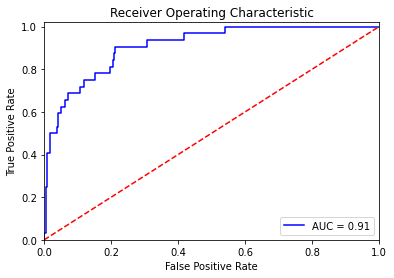

In [3]:
# Random forest classifier

X_rf = df[["gdpgrowth","nmgdp","life","geo1", "infant", "trade", "lmtnest", "illiteracy", "dlang", "anocracy", "regd4_alt"
           , "sxpsq", "dem", "milper", "popdense", "inst3", "ef", "seceduc", "sxpnew"]]


X_train, X_test, y_train, y_test = train_test_split(X_rf, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

gini = clf.feature_importances_ #(normalize=False)


std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(gini)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_test.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], gini[indices[f]]))


# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.02])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

